In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

data = pd.read_csv('../../data/processed/sleep_cycle_productivity.csv')
data

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,5192,38,Female,22.78,4.15,5.37,1,55,216,96,9.384504,5,2,1
4996,2024-06-02,7134,55,Male,21.48,5.39,7.91,4,70,81,177,5.016193,5,6,2
4997,2024-08-13,6265,44,Female,22.02,2.82,4.80,6,21,90,139,11.788651,2,7,1
4998,2024-12-26,4205,55,Other,23.47,7.87,8.40,9,15,87,161,7.093145,8,1,6


In [ ]:
data.dtypes

,0
Date,object
Person_ID,int64
Age,int64
Gender,object
Sleep Start Time,float64
Sleep End Time,float64
Total Sleep Hours,float64
Sleep Quality,int64
Exercise (mins/day),int64
Caffeine Intake (mg),int64


In [ ]:
data.drop(['Person_ID','Caffeine Intake (mg)'], axis=1, inplace=True)
data.head()

,Date,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,32,Other,23.33,4.61,5.28,3,86,116,8.808920,8,3,6
1,2024-11-04,41,Female,21.02,2.43,5.41,5,32,88,6.329833,10,3,7
2,2024-08-31,20,Male,22.10,3.45,5.35,7,17,59,8.506306,10,9,10
3,2024-02-22,37,Other,23.10,6.65,7.55,8,46,80,6.070240,8,4,2
4,2024-02-23,46,Other,21.42,4.17,6.75,10,61,94,11.374994,8,7,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Age                            5000 non-null   int64  
 2   Gender                         5000 non-null   object 
 3   Sleep Start Time               5000 non-null   float64
 4   Sleep End Time                 5000 non-null   float64
 5   Total Sleep Hours              5000 non-null   float64
 6   Sleep Quality                  5000 non-null   int64  
 7   Exercise (mins/day)            5000 non-null   int64  
 8   Screen Time Before Bed (mins)  5000 non-null   int64  
 9   Work Hours (hrs/day)           5000 non-null   float64
 10  Productivity Score             5000 non-null   int64  
 11  Mood Score                     5000 non-null   int64  
 12  Stress Level                   5000 non-null   i

In [ ]:
#data.Gender[data['Gender']== 'Female'] = '0'
#data.Gender[data['Gender']== 'Male'] = '1'
#data.Gender[data['Gender']== 'Other'] = '2'

data.loc[data['Gender'] == 'Female', 'Gender'] = '0'
data.loc[data['Gender'] == 'Male', 'Gender'] = '1'
data.loc[data['Gender'] == 'Other', 'Gender'] = '2'


# 연속형 -> 순서형
ordered_score = CategoricalDtype(categories=list(range(1, 11)), ordered=True)

# 적용
data['Sleep Quality'] = data['Sleep Quality'].astype(ordered_score)
data['Productivity Score'] = data['Productivity Score'].astype(ordered_score)
data['Mood Score'] = data['Mood Score'].astype(ordered_score)
data['Stress Level'] = data['Stress Level'].astype(ordered_score)


#data['Sleep Quality'] = data['Sleep Quality'].astype('category')
#data['Productivity Score'] = data['Productivity Score'].astype('category')
#data['Mood Score'] = data['Mood Score'].astype('category')
#data['Stress Level']= data['Stress Level'].astype('category')

#날짜 -> 요일 변경
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Weekday'] = data['Date'].dt.day_name()

In [ ]:
print(data['Sleep Quality'].dtype)
print(data['Sleep Quality'].head())

print(data['Productivity Score'].head())
print(data['Mood Score'].head())
print(data['Stress Level'].head())

category
0     3
1     5
2     7
3     8
4    10
Name: Sleep Quality, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]
0     8
1    10
2    10
3     8
4     8
Name: Productivity Score, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]
0    3
1    3
2    9
3    4
4    7
Name: Mood Score, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]
0     6
1     7
2    10
3     2
4     9
Name: Stress Level, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]


In [ ]:
print(data['Age'].min())
print(data['Age'].max())

18
59


In [ ]:
data['Age'] = (data['Age'] // 10) * 10

In [ ]:
data['Age'].value_counts()

,count
Age,
50,1235
40,1171
20,1164
30,1163
10,267


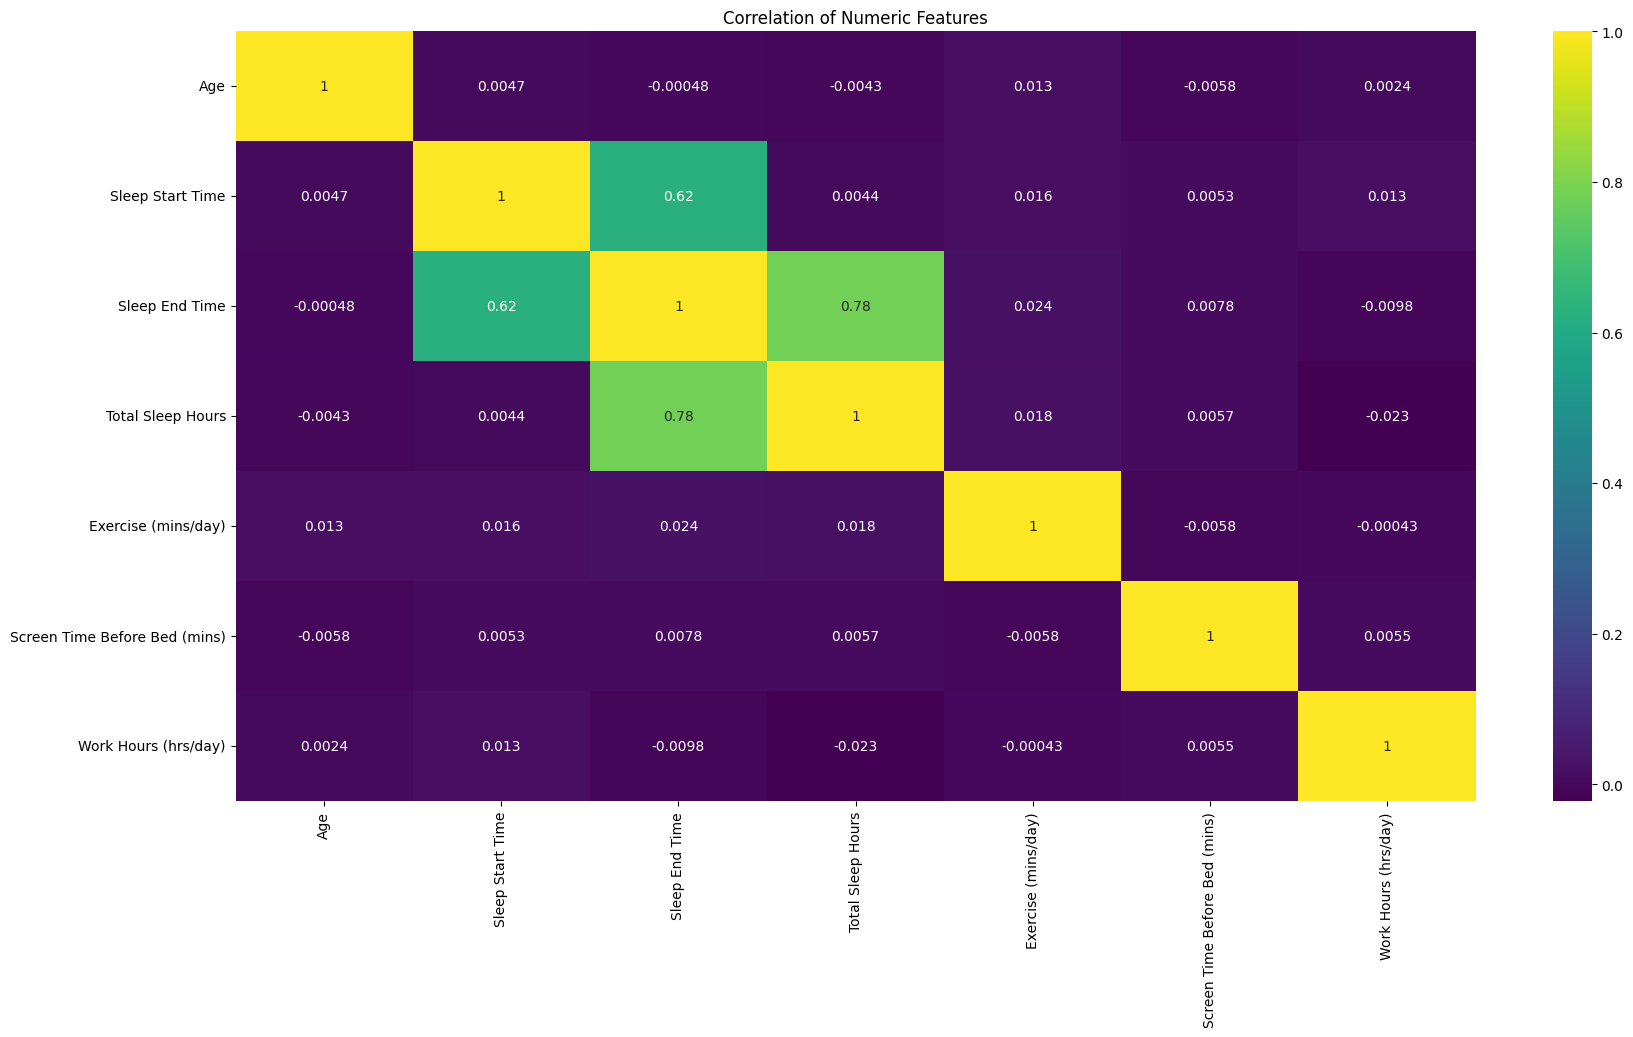

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='viridis')
plt.title('Correlation of Numeric Features')
plt.show()

변수 간 상관성 분석을 진행한 결과 Total Sleep Time과 Sleep End Time의 상관성이 0.78로 높게 측정되었고, Sleep Start Time과 Sleep End Time 역시 0.62로 상관성이 높게 측정 되었음을 확인할 수 있다.

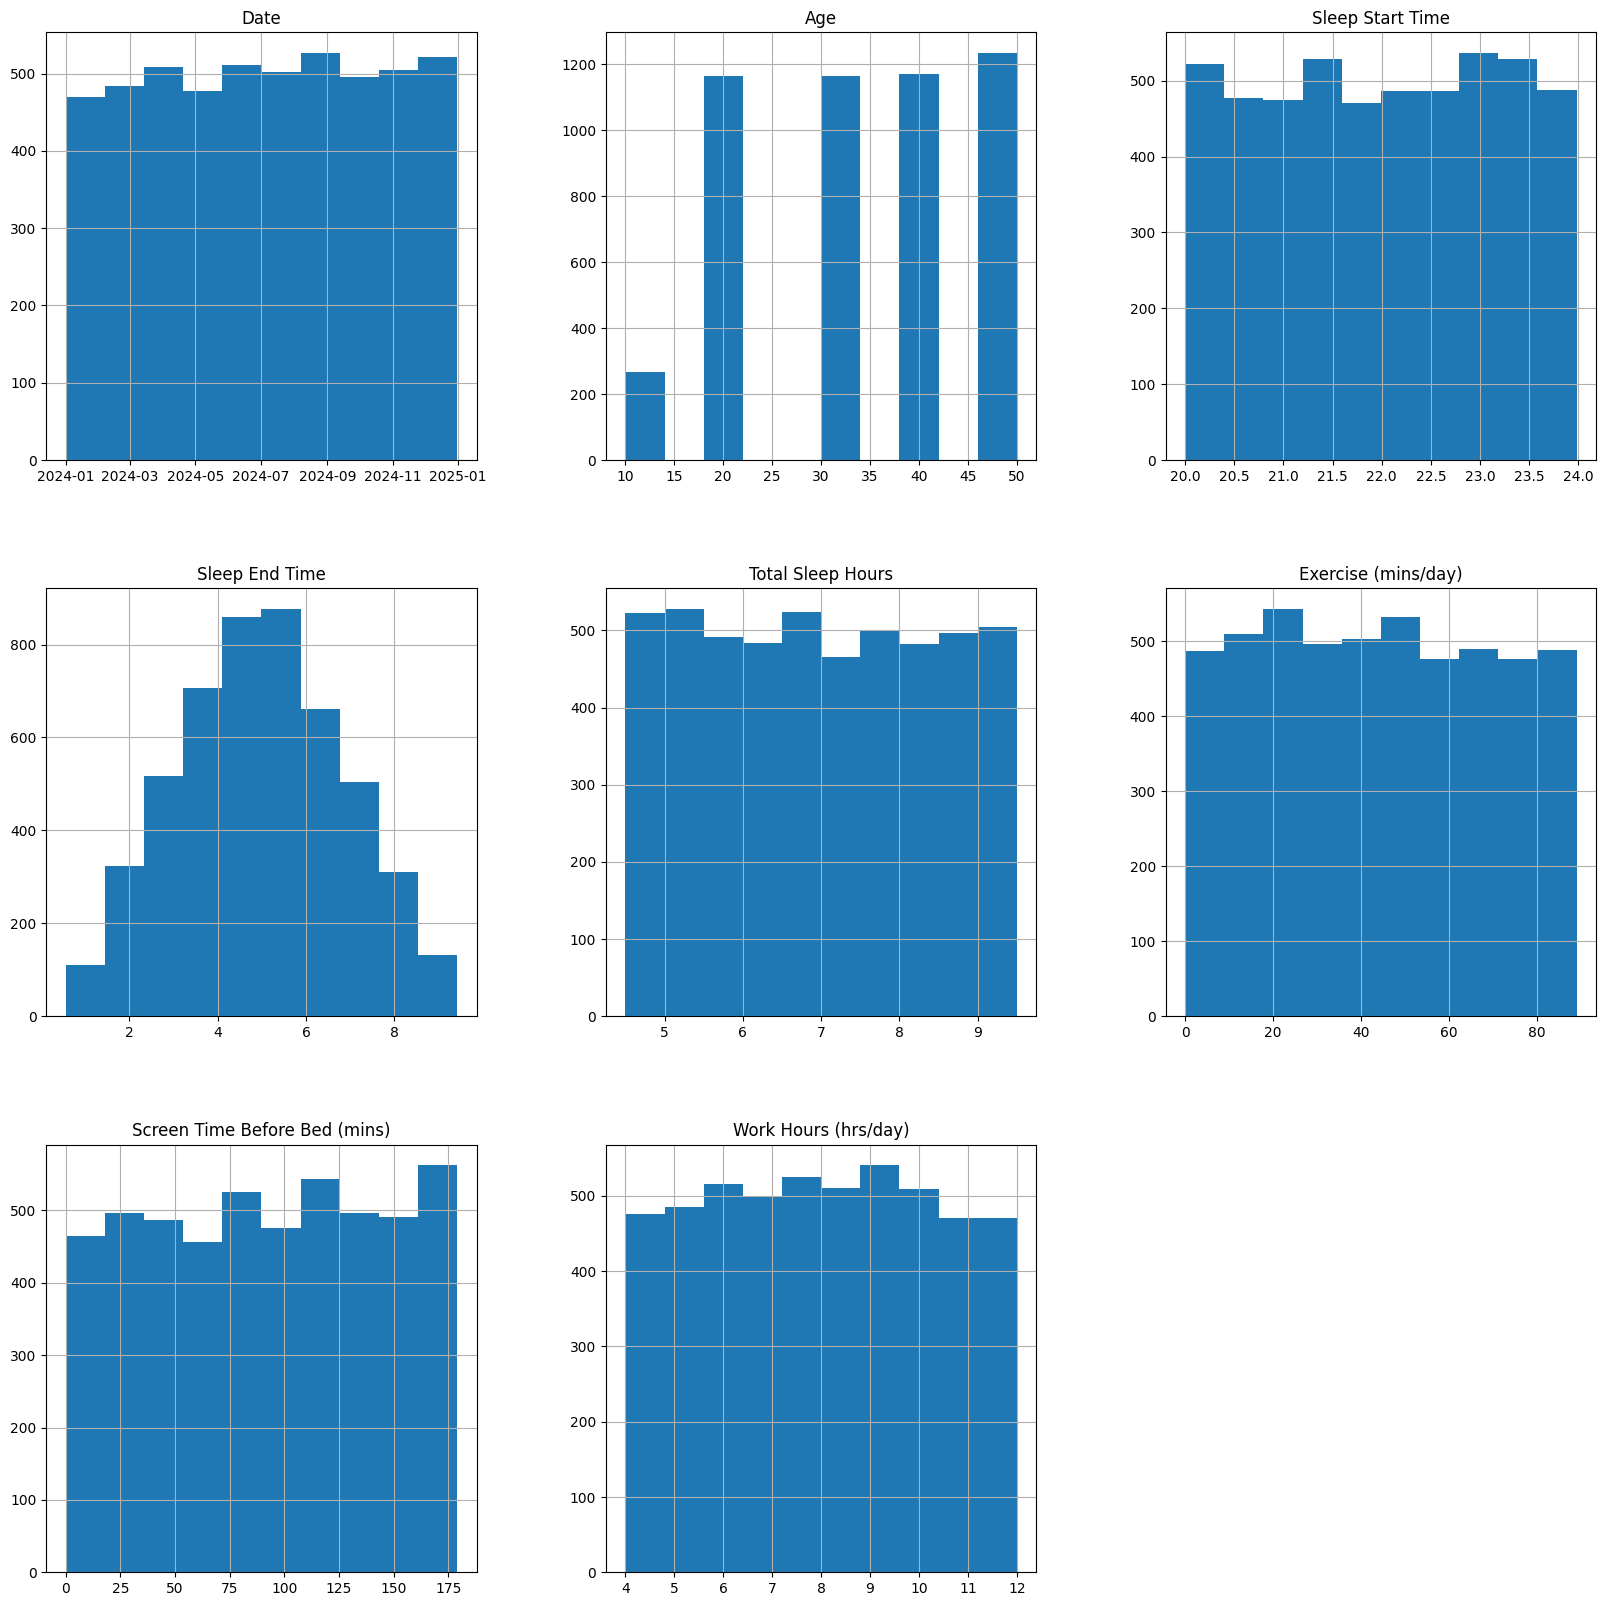

In [ ]:
data.hist(figsize=(20,20))
plt.show()

In [ ]:
data.columns

Index(['Date', 'Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
       'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level', 'Weekday'],
      dtype='object')

In [ ]:
cols = ['Date', 'Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
       'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level']

In [ ]:
category_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
category_features

['Gender',
 'Sleep Quality',
 'Productivity Score',
 'Mood Score',
 'Stress Level',
 'Weekday']

####**범주형**####

In [ ]:
category_features

['Gender',
 'Sleep Quality',
 'Productivity Score',
 'Mood Score',
 'Stress Level',
 'Weekday']

In [ ]:
cols = ['Gender',
 'Sleep Quality',
 'Productivity Score',
 'Mood Score',
 'Stress Level',
 'Weekday']

x_column = ['Gender',
 'Sleep Quality',
 'Productivity Score',
 'Mood Score',
 'Stress Level',
 'Weekday']

<ipython-input-19-940e303c365a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Sleep Quality'],ax=plot1[0], palette=purple_palette)


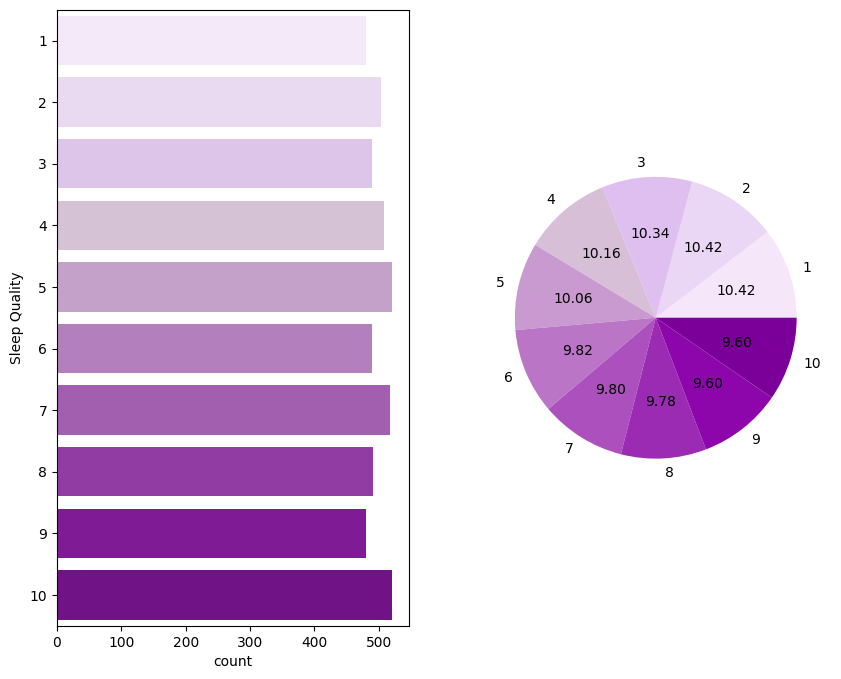

In [ ]:
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

purple_palette = [
    "#F5E6FA", "#EAD6F5", "#DFBFEF", "#D8BFD8", "#C99ACF",
    "#BA75C6", "#AB50BD", "#9C2BB4", "#8D06AB", "#7A0099"
]

sns.countplot(data['Sleep Quality'],ax=plot1[0], palette=purple_palette)

labels=["1","2","3","4","5","6","7","8","9","10"]

plt.pie(data["Sleep Quality"].value_counts() , labels =labels ,autopct='%.02f',colors=purple_palette);

Sleep Quality를 범주형 변수로 반환하여 1부터 10까지의 수면의 질을 자가평가 했을 때 1부터 10까지의 범주 모두 대략 10의 크기를 가지며 고른 분포를 나타냄을 확인할 수 있다.

In [ ]:
data['Sleep_Quality_Binary'].value_counts()

,count
Sleep_Quality_Binary,
1,3019
0,1981


Sleep Quality를 중위값인 5를 기준으로 하여 5보다 크면 '수면의 질 좋음(1)'로 판단하였고, 5보다 작으면 '수면의 질 나쁨(0)'으로 분류하여 나타내었다. 이진형으로 변수를 정리한 결과 '수면의 질 좋음(1)'은 3019개, '수면의 질 나쁨(0)'은 1981개로 나타남을 확인할 수 있었다.

<ipython-input-40-67a7a554b448>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sleep_Quality_Binary', data=data, ax=plot1[0], palette=purple_palette)
<ipython-input-40-67a7a554b448>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1[0].set_xticklabels(['Bad', 'Good'])


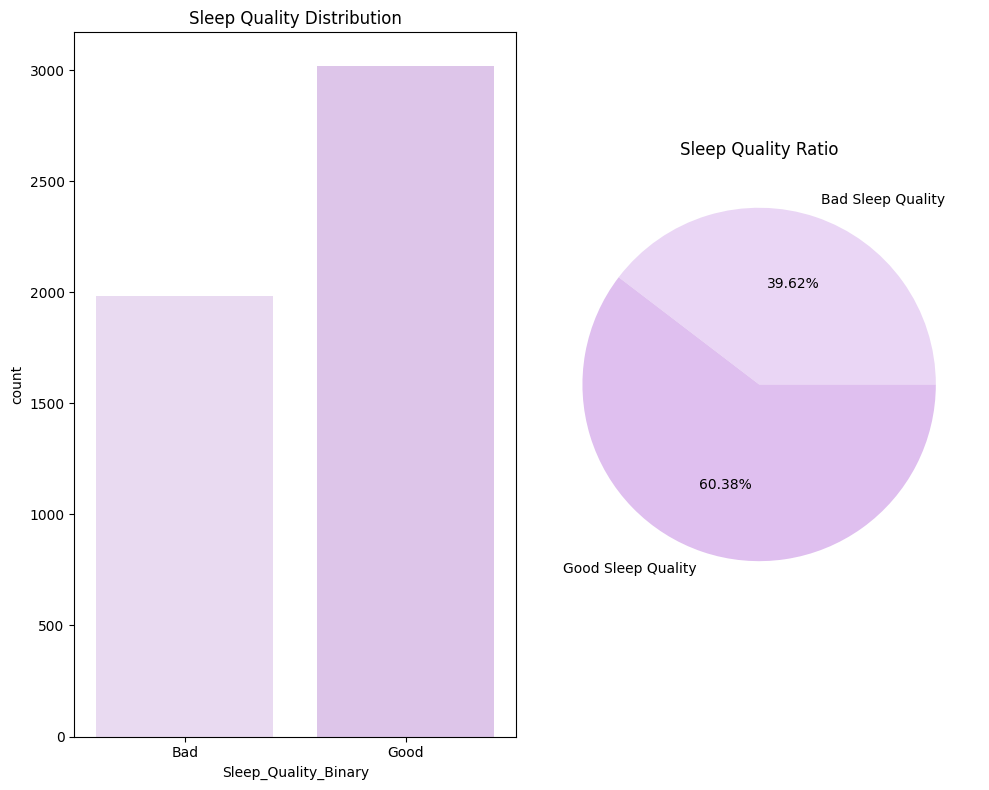

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이진화
data['Sleep_Quality_Binary'] = (data['Sleep Quality'] >= 5).astype(int)

# 시각화 설정
figure1, plot1 = plt.subplots(1, 2, figsize=(10, 8))
purple_palette = ["#EAD6F5",  "#DFBFEF"]  # 0 = Bad, 1 = Good

# countplot
sns.countplot(x='Sleep_Quality_Binary', data=data, ax=plot1[0], palette=purple_palette)
plot1[0].set_xticklabels(['Bad', 'Good'])
plot1[0].set_title('Sleep Quality Distribution')

# pie chart – value_counts 정렬을 [0,1] 순서로!
counts = data['Sleep_Quality_Binary'].value_counts().sort_index()  # 0 먼저, 1 다음
labels = ["Bad Sleep Quality", "Good Sleep Quality"]

plot1[1].pie(
    counts,
    labels=labels,
    autopct='%.02f%%',
    colors=purple_palette
)
plot1[1].set_title('Sleep Quality Ratio')

plt.tight_layout()
plt.show()


수면의 질을 중위수 5를 기준으로 5보다 크면 '수면의 질 좋음(1)', 5보다 작으면 '수면의 질 나쁨(0)'으로 분류하였고, 이때 '수면의 질 좋음(1)'이 60.38%이고, '수면의 질 나쁨(0)'이 39.62%로 '수면의 질 좋음(1)'이 조금 더 많은 값을 가지고 약 6:4의 비율을 나타내고 있음을 알 수 있다.

<ipython-input-41-fad5556bb42f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Sleep_Quality_Binary', y = 'Productivity Score', data = data, palette=pink_palette)
<ipython-input-41-fad5556bb42f>:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(x = 'Sleep_Quality_Binary', y = 'Productivity Score', data = data, palette=pink_palette)


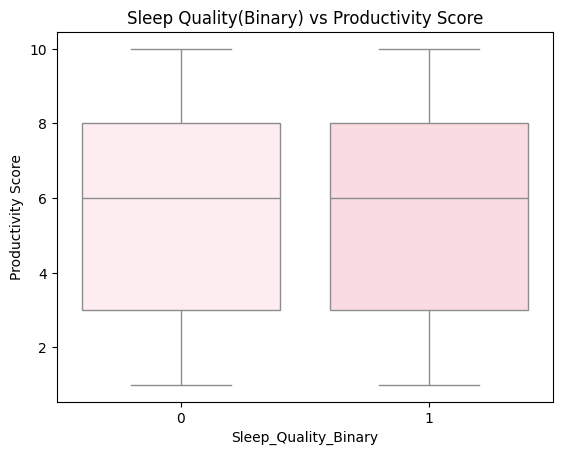

In [ ]:
pink_palette = [
    "#FFEBEF", "#FFD6DE", "#FFC1CE", "#FFADBE", "#FF99AF",
    "#FF85A0", "#FF708F", "#FF5C7F", "#FF476F", "#FF335F"
]

sns.boxplot(x = 'Sleep_Quality_Binary', y = 'Productivity Score', data = data, palette=pink_palette)
plt.title('Sleep Quality(Binary) vs Productivity Score')
plt.show()

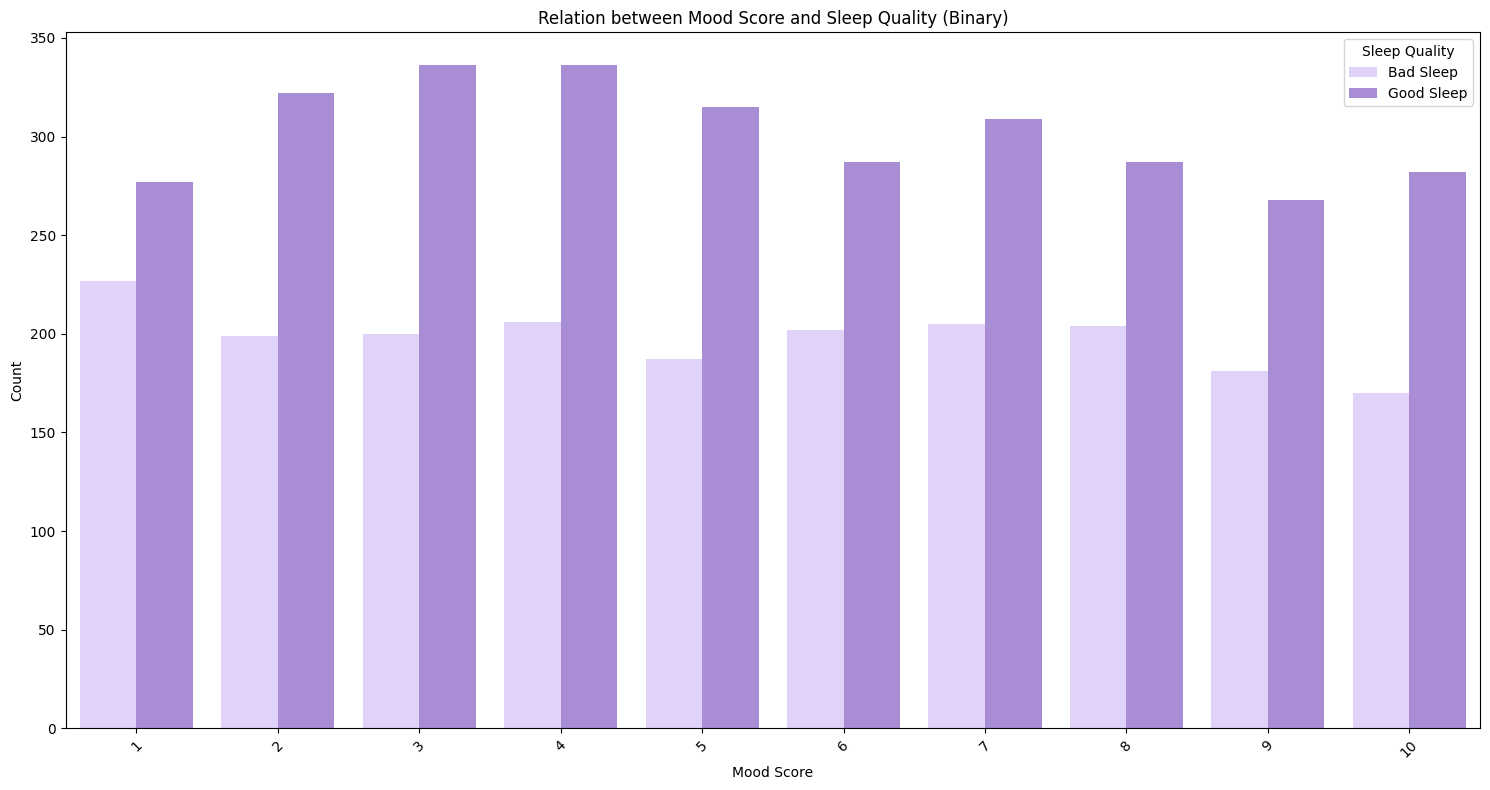

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sleep Quality 이분형 처리 (이미 되어 있다면 생략 가능)
data['Sleep_Quality_Binary'] = (data['Sleep Quality'] >= 5).astype(int)

# 색상 정의 (이분형: 0=Bad, 1=Good)
binary_palette = {
    0: '#e0ccff',  # Bad Sleep
    1: '#a580e0'   # Good Sleep
}

plt.figure(figsize=(15, 8))

sns.countplot(
    data=data,
    x="Mood Score",
    hue="Sleep_Quality_Binary",
    palette=binary_palette
)

plt.title("Relation between Mood Score and Sleep Quality (Binary)")
plt.xlabel("Mood Score")
plt.ylabel("Count")
plt.legend(title="Sleep Quality", labels=["Bad Sleep", "Good Sleep"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

기분 점수에 따른 수면의 질을 나타내고 있는 그래프이다. 자가 평가된 기분 점수에 따른 수면의 질의 분포를 확인할 수 있고, 대체적으로 기분 점수에 상관없이 '수면의 질 좋음'이 '수면의 질 나쁨'보다 더 많이 분포하고 있음을 확인할 수 있다.

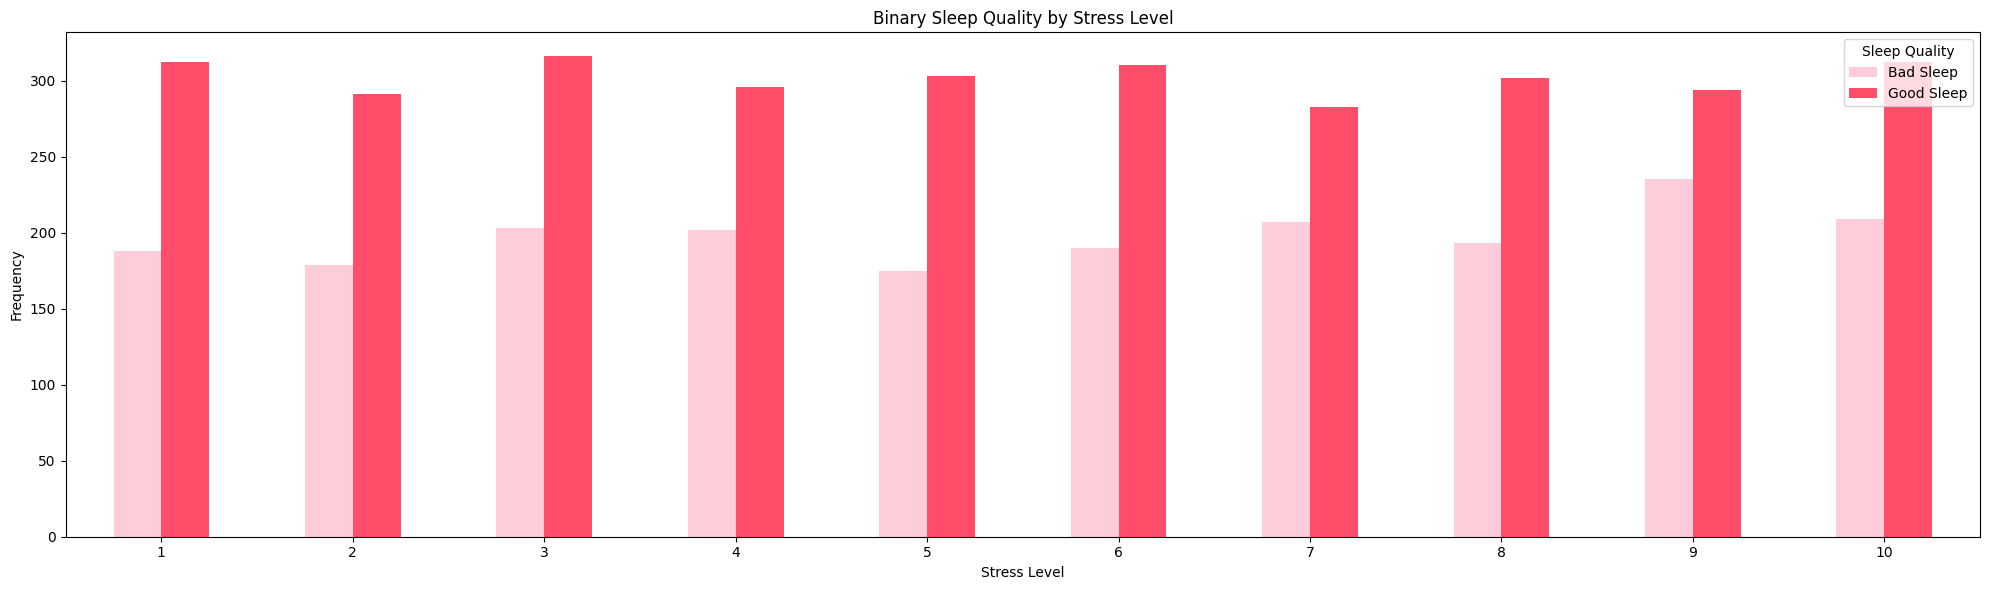

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pastel_pink_palette = [
    "#ffe6f0", "#ffccd9", "#ffb3c2", "#ff99ab", "#ff8095",
    "#ff6680", "#ff4d6a", "#ff3355", "#ff1a40", "#ff002a"
]

pd.crosstab(data['Stress Level'], data['Sleep Quality']).plot(
    kind="bar", figsize=(20, 6), color=pastel_pink_palette
)

plt.title('Sleep Quality by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Sleep Quality')
plt.show()

스트레스 점수에 따른 수면의 질을 나타내고 있는 그래프이다. 스트레스 지수에 상관없이

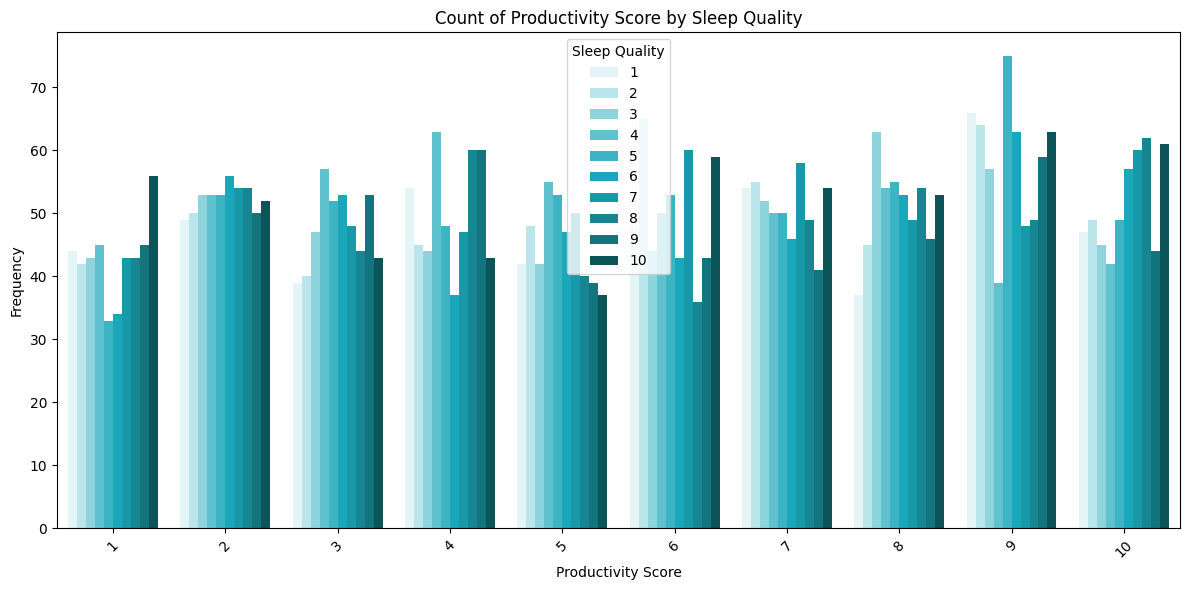

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pastel_palette = {
    1: "#e0f7fa",
    2: "#b2ebf2",
    3: "#80deea",
    4: "#4dd0e1",
    5: "#26c6da",
    6: "#00bcd4",
    7: "#00acc1",
    8: "#0097a7",
    9: "#00838f",
    10: "#006064",
}

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Productivity Score", hue="Sleep Quality", palette=pastel_palette)

plt.title("Count of Productivity Score by Sleep Quality")
plt.xlabel("Productivity Score")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Sleep Quality")
plt.tight_layout()
plt.show()

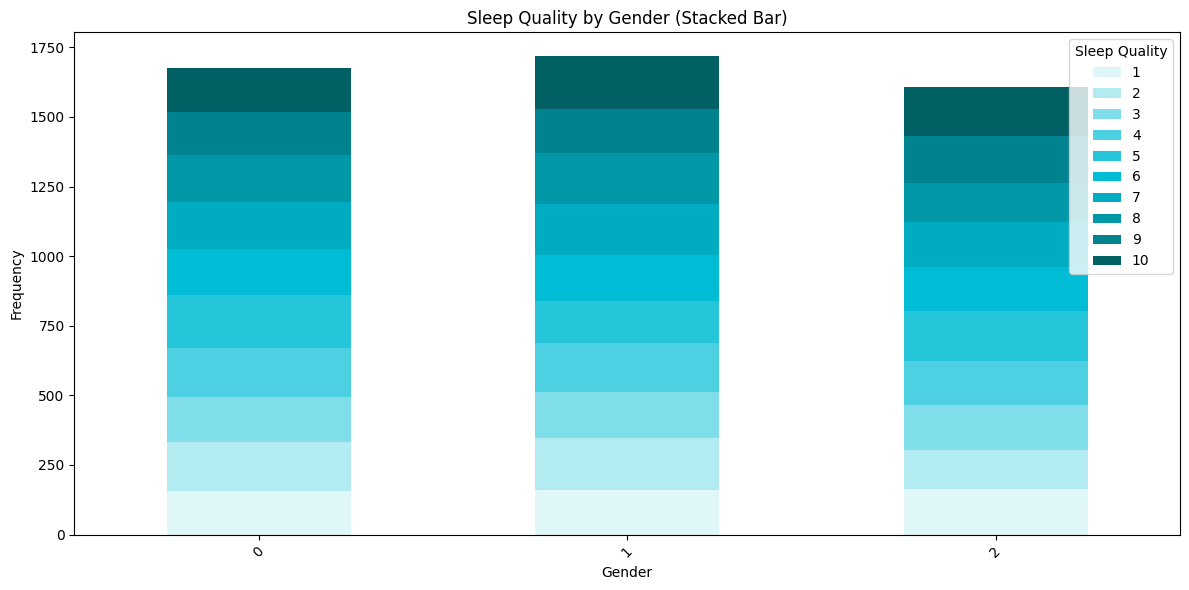

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ct = pd.crosstab(data['Gender'], data['Sleep Quality'])

sky_blue_palette = [
    "#e0f7fa", "#b2ebf2", "#80deea", "#4dd0e1", "#26c6da",
    "#00bcd4", "#00acc1", "#0097a7", "#00838f", "#006064"
]

ct.plot(kind='bar', stacked=True, figsize=(12, 6), color=sky_blue_palette)

plt.title("Sleep Quality by Gender (Stacked Bar)")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Sleep Quality")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

ct = pd.crosstab(data['Gender'], data['Sleep Quality'])
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-squared: {chi2:.2f}, p-value: {p:.4f}")


Chi-squared: 19.79, p-value: 0.3448


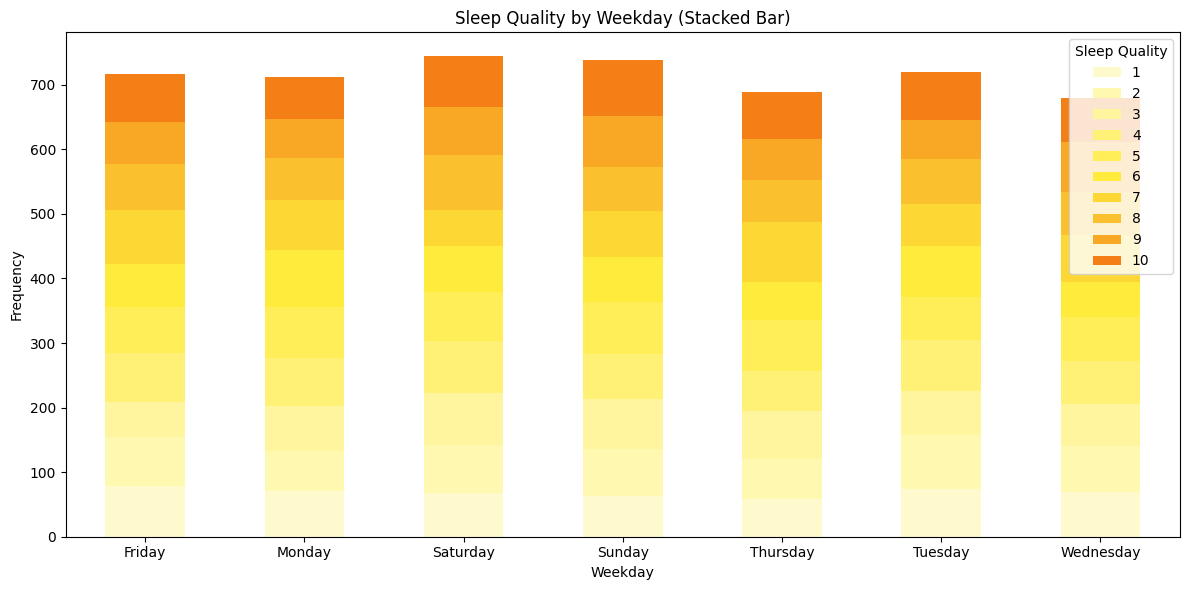

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

ct = pd.crosstab(data['Weekday'], data['Sleep Quality'])

lemon_palette = [
    "#FFFACD", "#FFF8B0", "#FFF59E", "#FFF176", "#FFEE58",
    "#FFEB3B", "#FDD835", "#FBC02D", "#F9A825", "#F57F17"
]

ct.plot(kind='bar', stacked=True, figsize=(12, 6), color=lemon_palette)

plt.title("Sleep Quality by Weekday (Stacked Bar)")
plt.xlabel("Weekday")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Sleep Quality")
plt.tight_layout()
plt.show()

In [ ]:
data

,Date,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Weekday
0,2024-04-12,30,2,23.33,4.61,5.28,3,86,116,8.808920,8,3,6,Friday
1,2024-11-04,40,0,21.02,2.43,5.41,5,32,88,6.329833,10,3,7,Monday
2,2024-08-31,20,1,22.10,3.45,5.35,7,17,59,8.506306,10,9,10,Saturday
3,2024-02-22,30,2,23.10,6.65,7.55,8,46,80,6.070240,8,4,2,Thursday
4,2024-02-23,40,2,21.42,4.17,6.75,10,61,94,11.374994,8,7,9,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-01-03,30,0,22.78,4.15,5.37,1,55,96,9.384504,5,2,1,Wednesday
4996,2024-06-02,50,1,21.48,5.39,7.91,4,70,177,5.016193,5,6,2,Sunday
4997,2024-08-13,40,0,22.02,2.82,4.80,6,21,139,11.788651,2,7,1,Tuesday
4998,2024-12-26,50,2,23.47,7.87,8.40,9,15,161,7.093145,8,1,6,Thursday


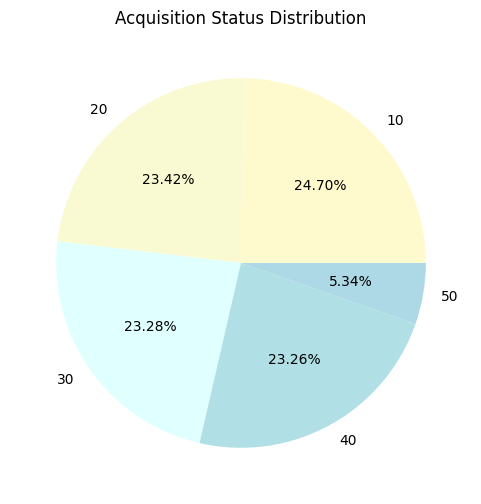

In [ ]:
import matplotlib.pyplot as plt

labels = ["10", "20", "30", "40", "50"]
colors = ["#FFFACD", "#FAFAD2", "#E0FFFF", "#B0E0E6", "#ADD8E6"]

plt.figure(figsize=(6, 6))
plt.pie(data["Age"].value_counts(), labels=labels, colors=colors, autopct='%.02f%%')
plt.title("Acquisition Status Distribution")
plt.show()

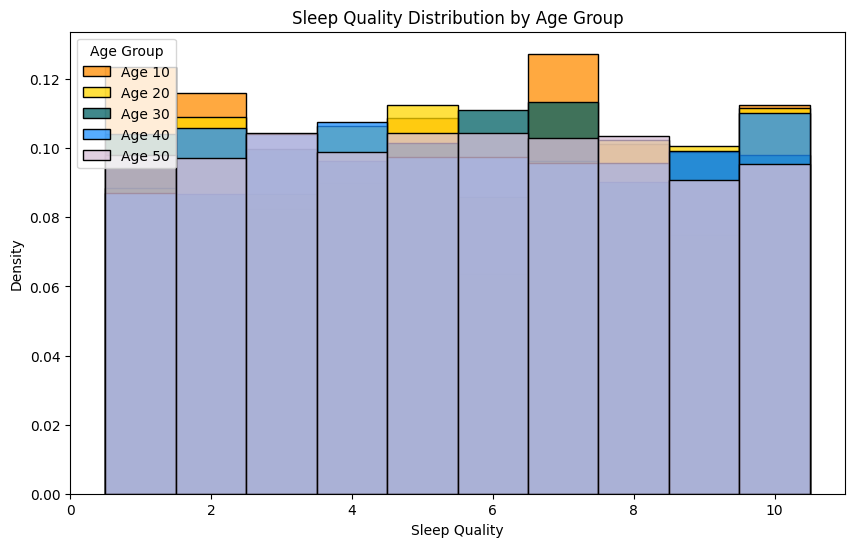

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

age_groups = [10, 20, 30, 40, 50]
colors = ['#FF8C00',
          '#FFD700',
          '#006064',
          '#1E90FF',
          '#D8BFD8']

for age, color in zip(age_groups, colors):
    sns.histplot(
        data=data[data.Age == age],
        x="Sleep Quality",
        color=color,
        label=f"Age {age}",
        kde=False,
        stat='density',
        element='bars',
        fill=True
    )

plt.title("Sleep Quality Distribution by Age Group")
plt.xlabel("Sleep Quality")
plt.ylabel("Density")
plt.legend(title="Age Group")
plt.show()


####**연속형**####

In [ ]:
data.numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
data.numeric_features

<ipython-input-30-b78f671fc69b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.numeric_features = data.select_dtypes(include=['int64', 'float64']).columns


Index(['Age', 'Sleep Start Time', 'Sleep End Time', 'Total Sleep Hours',
       'Exercise (mins/day)', 'Screen Time Before Bed (mins)',
       'Work Hours (hrs/day)'],
      dtype='object')

In [ ]:
data['Age'].dtype

dtype('int64')

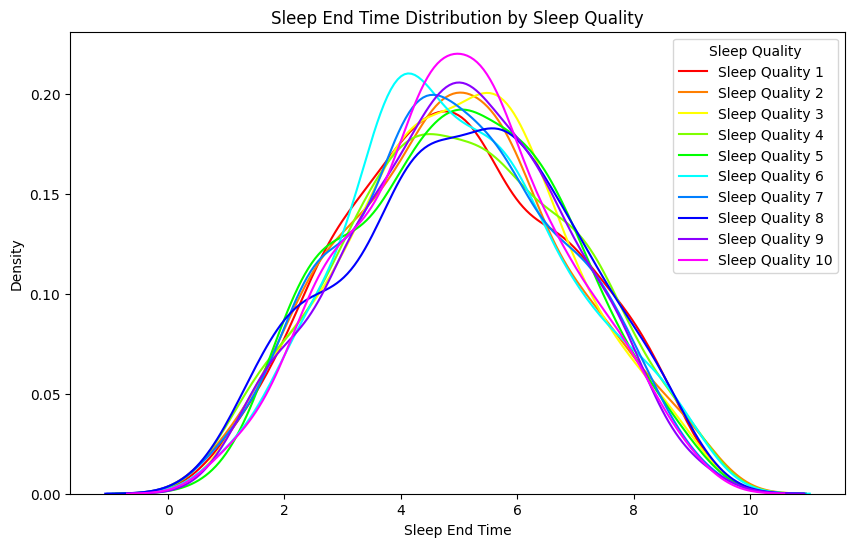

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

quality_levels = range(1, 11)

colors = ['#FF0000', '#FF7F00', '#FFFF00', '#7FFF00', '#00FF00',
          '#00FFFF', '#007FFF', '#0000FF', '#8B00FF', '#FF00FF']

for q, color in zip(quality_levels, colors):
    sns.kdeplot(
        data=data[data['Sleep Quality'] == q],
        x="Sleep End Time",
        color=color,
        label=f"Sleep Quality {q}"
    )

plt.title("Sleep End Time Distribution by Sleep Quality")
plt.xlabel("Sleep End Time")
plt.ylabel("Density")
plt.legend(title="Sleep Quality")
plt.show()


<Figure size 2000x1000 with 0 Axes>

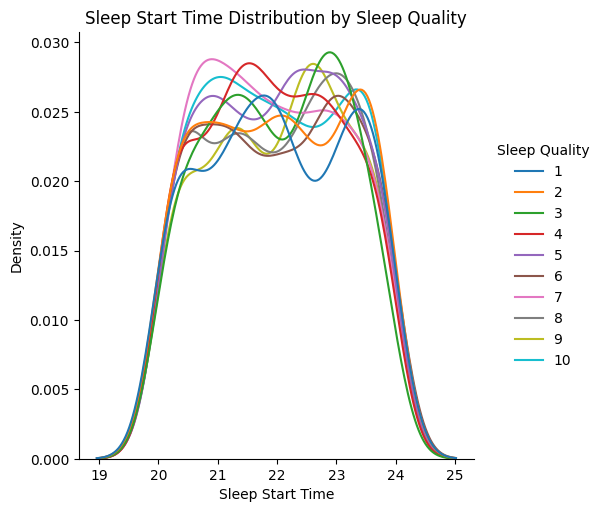

In [ ]:
plt.figure(figsize=(20, 10))

sns.displot(data=data, x='Sleep Start Time', hue='Sleep Quality', kind="kde")
plt.title("Sleep Start Time Distribution by Sleep Quality")
plt.xlabel("Sleep Start Time")
plt.ylabel("Density")
plt.show()

<ipython-input-34-57a0e6ea84f0>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Exercise Level')


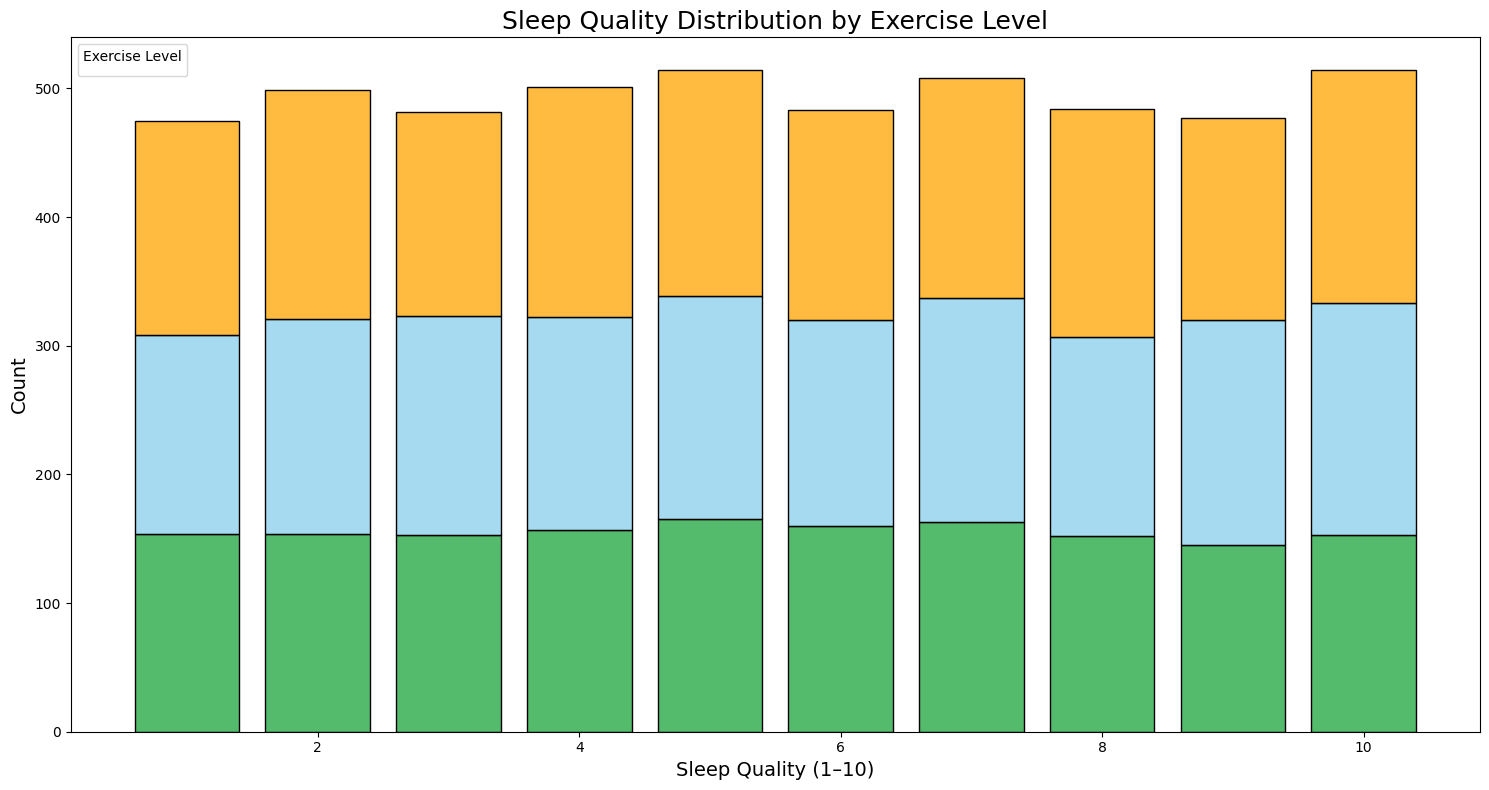

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

data['Exercise Level'] = pd.cut(data['Exercise (mins/day)'],
                                bins=[0, 30, 60, data['Exercise (mins/day)'].max()],
                                labels=['Low', 'Medium', 'High'])

sns.histplot(data=data, x='Sleep Quality', hue='Exercise Level', multiple='stack',
             palette=['#FFA500', '#87CEEB', '#1CA53B'], shrink=0.8, discrete=True)

plt.title('Sleep Quality Distribution by Exercise Level', fontsize=18)
plt.xlabel('Sleep Quality (1–10)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Exercise Level')
plt.tight_layout()
plt.show()

<ipython-input-44-85e38277352b>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sleep Quality')


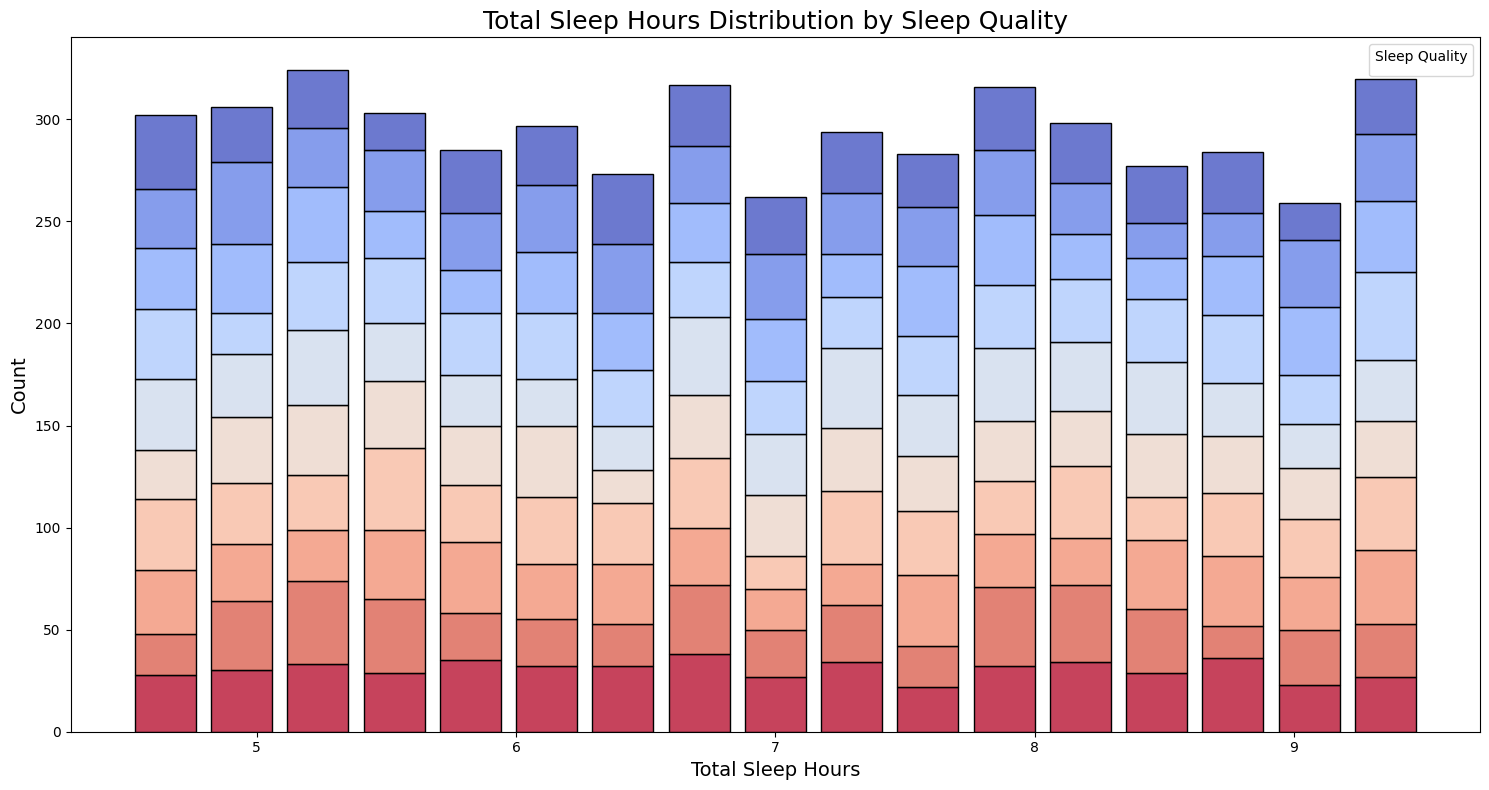

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15, 8))

sns.histplot(
    data=data,
    x='Total Sleep Hours',
    hue='Sleep Quality',
    palette='coolwarm',
    multiple='stack',
    discrete=False,   # Sleep Hours는 연속형이므로 discrete=False (또는 생략 가능)
    shrink=0.8
)

plt.title('Total Sleep Hours Distribution by Sleep Quality', fontsize=18)
plt.xlabel('Total Sleep Hours', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sleep Quality')
plt.tight_layout()
plt.show()


<ipython-input-42-8dc52e7aa086>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sleep Quality')


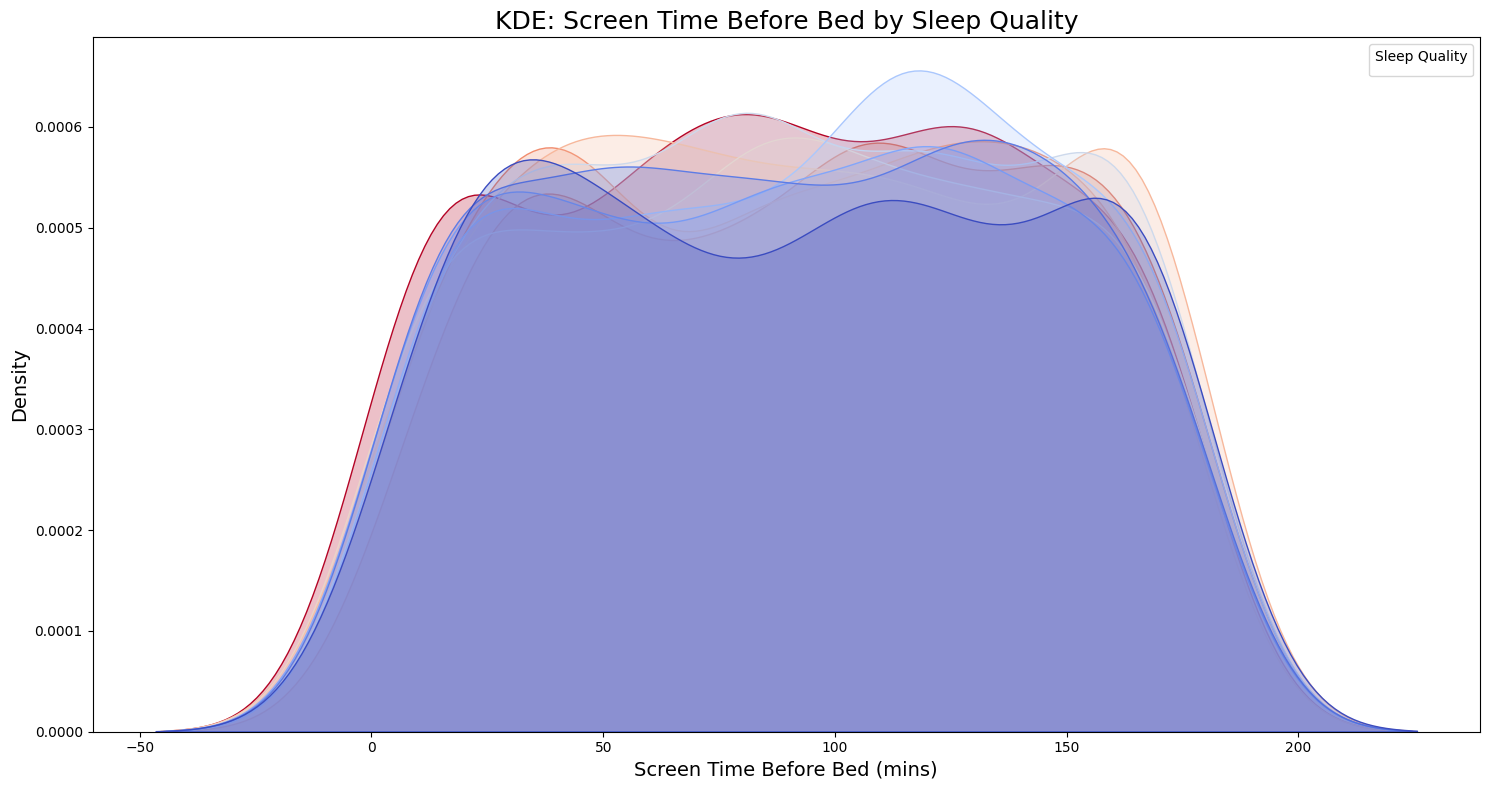

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 수면의 질을 숫자로 변환 (이미 되어 있다면 생략 가능)
data['Sleep Quality'] = pd.to_numeric(data['Sleep Quality'], errors='coerce')

plt.figure(figsize=(15, 8))

sns.kdeplot(
    data=data,
    x='Screen Time Before Bed (mins)',
    hue='Sleep Quality',
    palette='coolwarm',
    fill=True
)

plt.title('KDE: Screen Time Before Bed by Sleep Quality', fontsize=18)
plt.xlabel('Screen Time Before Bed (mins)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Sleep Quality')
plt.tight_layout()
plt.show()


<ipython-input-49-138651214b5f>:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sleep Quality')


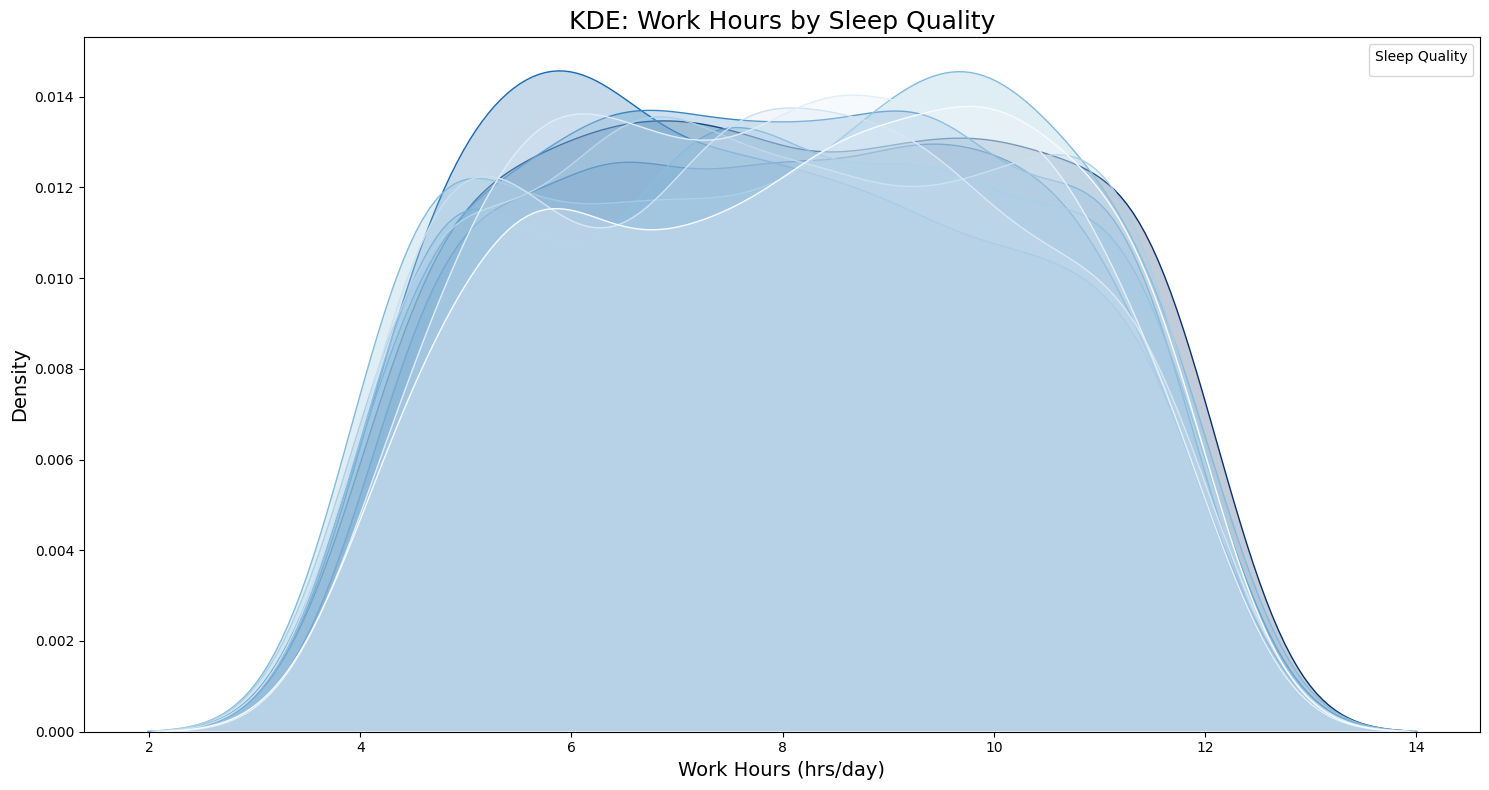

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

sns.kdeplot(
    data=data,
    x='Work Hours (hrs/day)',
    hue='Sleep Quality',
    palette='Blues',
    fill=True
)

plt.title('KDE: Work Hours by Sleep Quality', fontsize=18)
plt.xlabel('Work Hours (hrs/day)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Sleep Quality')
plt.tight_layout()
plt.show()
